## Question

### Can you predict if a sitter will have churned 180 days after they were approved at the point when their profile is approved?

## Data Import, Merge, Initial Look

In [4]:
import pandas as pd
path = '../Data Science Class/'
url1 = path + 'AllSittersApprovedAtLeast180DaysAgoFile1.csv'
url2 = path + 'AllSittersApprovedAtLeast180DaysAgoFile2.csv'
url3 = path + 'AllSittersApprovedAtLeast180DaysAgoFile3.csv'
rover1 = pd.read_csv(url1, index_col='id')
rover2 = pd.read_csv(url2, index_col='id')
rover3 = pd.read_csv(url3, index_col='id')

frames = [rover1, rover2, rover3]

rover = pd.concat(frames, axis = 1)

rover.head()

,month_signed_up,utm_source,utm_campaign,cbsa_code,listed_boarding,listed_traveling,listed_walking,listed_dropin,listed_daycare,month_signed_up,...,years_of_experience,dogs_on_furniture,children_in_home,building_home,building_apartment,building_farm,building_unknown,testimonial_requests,photos,churned
id,,,,,,,,,,,,,,,,,,,,,
121937,4,none,none,31080.0,1,1,0,1,0,4,...,0,2,0,0,1,0,0,0,4,0
121941,4,none,none,16740.0,1,1,0,0,1,4,...,15,1,1,1,0,0,0,0,16,1
121960,4,none,none,25420.0,1,1,0,1,0,4,...,2,1,0,1,0,0,0,0,4,0
121969,4,LT-lead-gen,craigslist-job-posting,17460.0,1,1,0,1,0,4,...,0,2,0,1,0,0,0,0,15,0
121972,4,none,lt+lead+gen,31080.0,1,1,0,0,0,4,...,15,1,0,1,0,0,0,0,11,0


In [5]:
rover.columns

Index([u'month_signed_up', u'utm_source', u'utm_campaign', u'cbsa_code',
       u'listed_boarding', u'listed_traveling', u'listed_walking',
       u'listed_dropin', u'listed_daycare', u'month_signed_up', u'monday',
       u'tuesday', u'wednesday', u'thursday', u'friday', u'saturday',
       u'sunday', u'has_dog', u'protection_package', u'month_signed_up',
       u'years_of_experience', u'dogs_on_furniture', u'children_in_home',
       u'building_home', u'building_apartment', u'building_farm',
       u'building_unknown', u'testimonial_requests', u'photos', u'churned'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

## Response Variable

In [7]:
print rover.churned.sum() ## number churned
print rover.churned.count() ## total in file

51742
96125


At 180 Days after your profile was first approved, you meet the following conditions:

Your profile is inactive (Explicit)
OR
You have not had an Event in the past 100 days* (Implicit)

*Less than 10% of sitters return who haven’t had an event in the past 100 days

## Evaluating Features

### Month Signed Up

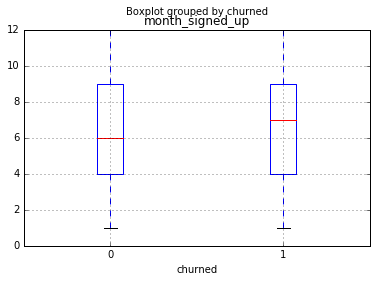

In [8]:
rover.boxplot(column='month_signed_up', by='churned')

### Photos

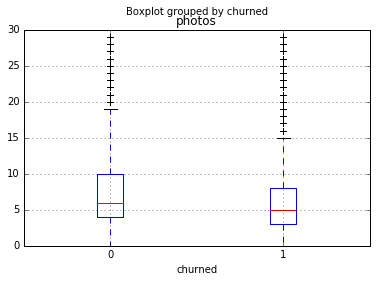

In [9]:
rover[rover.photos < 30].boxplot(column='photos', by='churned')

### Marketing Source

In [10]:
rover.groupby(['utm_source']).churned.mean()

utm_source
 embracepetinsurance.com     0.000000
24petwatch.com               0.461538
AAA                          0.500000
AARP-Career-Fair             0.500000
AARP_Career_Fair             0.000000
AdRoll                       0.318182
Amazon                       0.000000
BarkBox                      1.000000
CAG                          0.300000
CL-SSP                       0.142857
Craigslist_LT                0.500000
Direct-SSP                   0.294118
DockDogs+event               0.000000
ET                           0.516529
ExactTarget                  1.000000
FB-SSP                       0.200000
Facebook                     0.625000
FamilyPet                    0.000000
FlexJobs                     0.000000
FlierAd                      0.000000
Furry5k Pet-a-Palooza        0.250000
GPL+seattle                  0.000000
Google-Plus-Local            0.000000
HSUS                         0.400000
Instagram                    0.553191
JobDiagnosis                 0.571429
L

In [11]:
rover.groupby(['utm_campaign']).churned.mean()

utm_campaign
$50-member-benefits-offer                   0.500000
%%emailname_%%                              0.461538
100OnDemand                                 0.750000
11.24.14-$40-Offer-Follow-Up                0.000000
112286037                                   0.538462
112286038                                   0.500000
112286039                                   0.510204
112286040                                   0.622951
112286041                                   0.833333
112286042                                   0.625000
112286043                                   1.000000
12172014-_-Owner_Newsletter_12_17           0.000000
1242014-_-Sitter_Recruitment                0.300000
187773178                                   0.666667
187782058                                   1.000000
187790218                                   0.500000
2015SitterAcquisition-BAS-MultiDesktop      0.600000
2015SitterAcquisition-BAS-MultiMB           0.529412
2015SitterAcquisition-go.rover   

### CBSA Code

In [12]:
rover.groupby(['cbsa_code']).churned.mean()

cbsa_code
10100.0    0.500000
10140.0    0.400000
10180.0    0.625000
10220.0    0.000000
10300.0    0.600000
10420.0    0.482353
10460.0    0.333333
10500.0    0.333333
10540.0    0.333333
10580.0    0.460177
10620.0    0.666667
10700.0    0.500000
10740.0    0.521053
10780.0    0.750000
10820.0    0.250000
10900.0    0.453782
10940.0    0.333333
11020.0    0.666667
11100.0    0.352941
11180.0    0.454545
11260.0    0.425532
11460.0    0.495868
11500.0    0.250000
11540.0    0.454545
11660.0    1.000000
11700.0    0.554348
11740.0    0.500000
11780.0    0.666667
11820.0    0.250000
11900.0    0.375000
             ...   
48060.0    0.733333
48140.0    0.857143
48220.0    1.000000
48260.0    0.333333
48300.0    0.700000
48460.0    0.000000
48540.0    0.500000
48580.0    0.615385
48620.0    0.540000
48660.0    0.583333
48700.0    0.750000
48820.0    0.333333
48900.0    0.460993
48940.0    0.000000
48980.0    0.666667
49020.0    0.666667
49080.0    0.000000
49100.0    0.714286
49180.0   

### Service Type


In [13]:
rover.groupby(['listed_boarding']).churned.mean()

listed_boarding
0    0.641888
1    0.480332
Name: churned, dtype: float64

In [14]:
rover.groupby(['listed_traveling']).churned.mean()

listed_traveling
0    0.525350
1    0.545006
Name: churned, dtype: float64

In [15]:
rover.groupby(['listed_walking']).churned.mean()

listed_walking
0    0.551582
1    0.523384
Name: churned, dtype: float64

In [16]:
rover.groupby(['listed_dropin']).churned.mean()

listed_dropin
0    0.553078
1    0.528626
Name: churned, dtype: float64

In [17]:
rover.groupby(['listed_daycare']).churned.mean()

listed_daycare
0    0.579164
1    0.417425
Name: churned, dtype: float64

### Availability

In [18]:
rover.groupby(['monday']).churned.mean()

monday
0    0.571965
1    0.535879
Name: churned, dtype: float64

In [19]:
rover.groupby(['tuesday']).churned.mean()

tuesday
0    0.564225
1    0.536333
Name: churned, dtype: float64

In [20]:
rover.groupby(['wednesday']).churned.mean()

wednesday
0    0.558182
1    0.536821
Name: churned, dtype: float64

In [21]:
rover.groupby(['thursday']).churned.mean()

thursday
0    0.560291
1    0.536799
Name: churned, dtype: float64

In [22]:
rover.groupby(['friday']).churned.mean()

friday
0    0.591073
1    0.536220
Name: churned, dtype: float64

In [23]:
rover.groupby(['saturday']).churned.mean()

saturday
0    0.642776
1    0.534311
Name: churned, dtype: float64

In [24]:
rover.groupby(['sunday']).churned.mean()

sunday
0    0.649370
1    0.532589
Name: churned, dtype: float64

### Provider Detail

In [25]:
rover.groupby(['has_dog']).churned.mean()

has_dog
0    0.588194
1    0.506622
Name: churned, dtype: float64

In [26]:
rover.groupby(['protection_package']).churned.mean()

protection_package
0    0.560136
1    0.453652
Name: churned, dtype: float64

In [27]:
rover.groupby(['years_of_experience']).churned.mean()

years_of_experience
0          0.511646
1          0.624129
2          0.592798
3          0.572716
4          0.571216
5          0.572898
6          0.558409
7          0.534270
8          0.540765
9          0.530932
10         0.542586
11         0.534184
12         0.515302
13         0.550442
14         0.523017
15         0.526824
16         0.500502
17         0.501502
18         0.576117
19         0.577428
20         0.508741
21         0.533875
22         0.543825
23         0.536036
24         0.525000
25         0.469565
26         0.501661
27         0.522523
28         0.476190
29         0.429577
             ...   
50         0.422360
51         0.714286
52         0.400000
53         0.166667
54         0.166667
55         0.447368
56         0.571429
57         0.500000
58         0.500000
59         0.500000
60         0.428571
61         0.500000
62         0.333333
63         1.000000
65         0.111111
66         1.000000
67         0.500000
69         0.000000


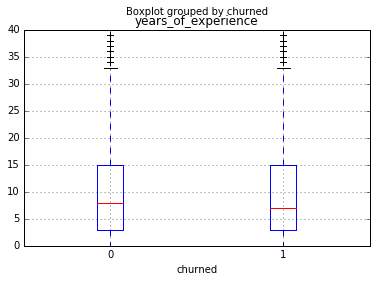

In [28]:
rover[rover.years_of_experience < 40].boxplot(column='years_of_experience', by='churned')

In [29]:
rover.groupby(['dogs_on_furniture']).churned.mean()

dogs_on_furniture
0    0.501956
1    0.479139
2    0.610454
Name: churned, dtype: float64

In [30]:
rover.groupby(['children_in_home']).churned.mean()

children_in_home
0    0.545644
1    0.472366
Name: churned, dtype: float64

In [31]:
rover.groupby(['testimonial_requests']).churned.mean()

testimonial_requests
0     0.289780
1     0.627928
2     0.570305
3     0.538681
4     0.504058
5     0.485354
6     0.469839
7     0.441301
8     0.453461
9     0.427984
10    0.432558
11    0.450000
12    0.322581
13    0.424242
14    0.411765
15    0.371429
16    0.588235
17    0.400000
18    0.363636
19    0.125000
20    0.142857
21    0.500000
22    0.000000
23    1.000000
24    1.000000
26    0.000000
27    1.000000
28    0.000000
29    0.500000
30    0.500000
31    1.000000
32    0.500000
34    0.000000
36    1.000000
39    1.000000
53    0.000000
99    0.000000
Name: churned, dtype: float64

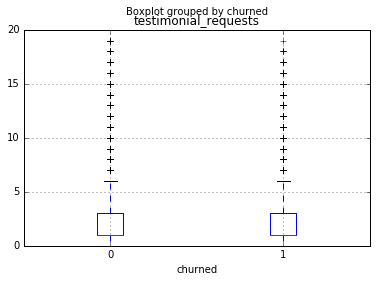

In [32]:
rover[rover.testimonial_requests < 20].boxplot(column='testimonial_requests', by='churned')

### Home Type

In [33]:
rover.groupby(['building_home']).churned.mean()

building_home
0    0.588213
1    0.462381
Name: churned, dtype: float64

In [34]:
rover.groupby(['building_apartment']).churned.mean()

building_apartment
0    0.544731
1    0.519201
Name: churned, dtype: float64

In [35]:
rover.groupby(['building_farm']).churned.mean()

building_farm
0    0.538619
1    0.491329
Name: churned, dtype: float64

In [36]:
rover.groupby(['building_unknown']).churned.mean()

building_unknown
0    0.484228
1    0.642087
Name: churned, dtype: float64

### Logistic Regression Model

In [37]:
feature_cols = ['month_signed_up', 'listed_boarding', 'listed_traveling', 'listed_walking', 'listed_daycare', 'listed_dropin', 'protection_package', 'building_home', 'children_in_home', 'has_dog', 'dogs_on_furniture', 'building_home', 'building_apartment', 'building_farm', 'building_unknown', 'saturday', 'sunday', 'photos']
X = rover[feature_cols]
y = rover.churned

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=126)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.612599866844


In [38]:
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

1    0.537866
Name: churned, dtype: float64

### Correlation

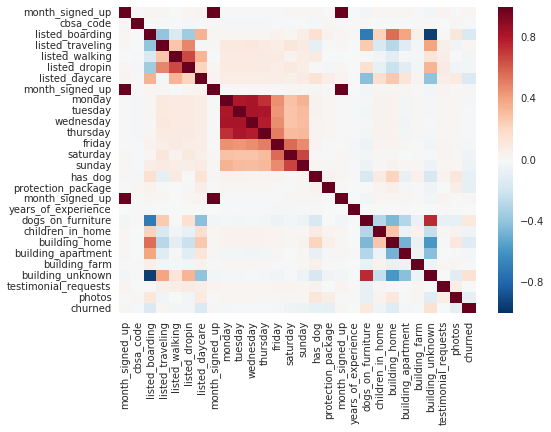

In [39]:
import seaborn as sns
sns.heatmap(rover.corr())

In [40]:
rover.corr()

,month_signed_up,cbsa_code,listed_boarding,listed_traveling,listed_walking,listed_dropin,listed_daycare,month_signed_up,monday,tuesday,...,years_of_experience,dogs_on_furniture,children_in_home,building_home,building_apartment,building_farm,building_unknown,testimonial_requests,photos,churned
month_signed_up,1.000000,0.005186,0.023414,0.015286,-0.000253,0.021674,0.026101,1.000000,0.004513,0.002366,...,-0.001373,-0.030586,0.018718,0.015456,0.010865,0.004694,-0.026632,0.023973,0.001940,0.012009
cbsa_code,0.005186,1.000000,-0.003683,-0.005395,-0.011224,-0.017011,0.004059,0.005186,-0.017614,-0.016461,...,0.003298,0.004277,-0.002427,-0.001767,-0.000675,0.002607,0.002364,-0.002520,0.009315,-0.010273
listed_boarding,0.023414,-0.003683,1.000000,-0.397844,-0.152840,-0.356592,0.343996,0.023414,0.020748,0.020079,...,0.002589,-0.704282,0.231962,0.560893,0.393804,0.061117,-0.947866,0.001590,0.115870,-0.155425
listed_traveling,0.015286,-0.005395,-0.397844,1.000000,0.277540,0.486125,-0.019340,0.015286,0.096738,0.095713,...,-0.004485,0.262744,-0.160282,-0.277952,-0.117793,-0.027013,0.398025,0.061107,-0.039052,0.018708
listed_walking,-0.000253,-0.011224,-0.152840,0.277540,1.000000,0.660691,0.336365,-0.000253,0.084537,0.087419,...,-0.002611,0.003662,-0.032744,-0.104272,-0.017943,-0.017127,0.126435,0.068603,-0.007685,-0.028235
listed_dropin,0.021674,-0.017011,-0.356592,0.486125,0.660691,1.000000,0.223489,0.021674,0.087888,0.089002,...,-0.003635,0.160891,-0.079635,-0.221532,-0.116748,-0.028408,0.339310,0.085165,-0.032136,-0.023974
listed_daycare,0.026101,0.004059,0.343996,-0.019340,0.336365,0.223489,1.000000,0.026101,0.072133,0.074755,...,-0.001367,-0.416189,0.166028,0.268764,0.132388,0.036262,-0.403960,0.064665,0.092219,-0.141000
month_signed_up,1.000000,0.005186,0.023414,0.015286,-0.000253,0.021674,0.026101,1.000000,0.004513,0.002366,...,-0.001373,-0.030586,0.018718,0.015456,0.010865,0.004694,-0.026632,0.023973,0.001940,0.012009
monday,0.004513,-0.017614,0.020748,0.096738,0.084537,0.087888,0.072133,0.004513,1.000000,0.810236,...,-0.011969,-0.023302,0.037284,0.044003,-0.029156,0.011861,-0.020801,0.020947,0.017798,-0.018035
tuesday,0.002366,-0.016461,0.020079,0.095713,0.087419,0.089002,0.074755,0.002366,0.810236,1.000000,...,-0.011666,-0.023957,0.038138,0.043831,-0.029217,0.013168,-0.020823,0.015891,0.017699,-0.014250


### ROC Curve

In [41]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[ 0.56067862  0.58260676  0.6618994  ...,  0.09263213  0.3738324
  0.45976077]


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

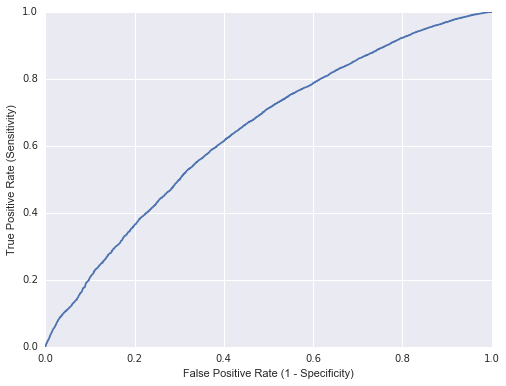

In [43]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#print(metrics.roc_curve(y_test, y_pred_prob))

In [44]:
print metrics.roc_auc_score(y_test, y_pred_prob)

0.645250852217


## Random Forest

In [64]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))

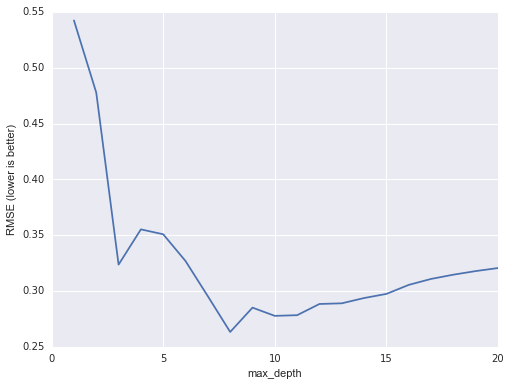

In [65]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [66]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.26325574448905964, 8)

In [67]:
# max_depth=.49 was best, so fit a tree using that parameter
treereg = DecisionTreeClassifier(max_depth=8, random_state=1)
treereg.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfreg = RandomForestClassifier()
rfreg

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))

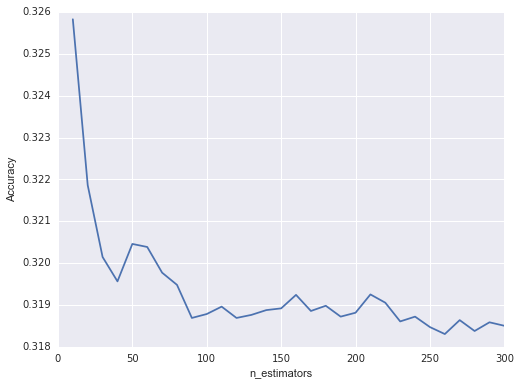

In [96]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [89]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, estimator_range))

[(0.31707218081047073, 40),
 (0.31760280545145886, 30),
 (0.31777964497996358, 20),
 (0.31785249118002445, 70),
 (0.31813333594734328, 50),
 (0.31880958913439628, 90),
 (0.319121741196909, 100),
 (0.31919440667440246, 80),
 (0.31969381816439979, 110),
 (0.31979788508984541, 140),
 (0.31982905170389314, 60),
 (0.31984992287537389, 130),
 (0.31984996183229458, 10),
 (0.32038050531246842, 180),
 (0.3205470548026732, 170),
 (0.32074454691645171, 120),
 (0.32154558668801203, 150),
 (0.32156650871665249, 160)]

In [90]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=160, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))

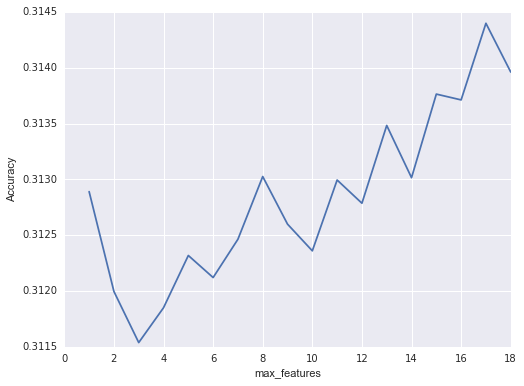

In [92]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [91]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))

[(0.31153751915700745, 3),
 (0.31184958464903556, 4),
 (0.31199532681956504, 2),
 (0.31212010150721042, 6),
 (0.3123177797448965, 5),
 (0.31235946906147205, 10),
 (0.31246343966921053, 7),
 (0.31259873705623176, 9),
 (0.31278597267333214, 12),
 (0.31289000713062476, 1),
 (0.31299406864032131, 11),
 (0.31301487163325098, 14),
 (0.31302523092987478, 8),
 (0.31348300071843649, 13),
 (0.31371185098141652, 16),
 (0.31376388660717447, 15),
 (0.3139615832412968, 18),
 (0.31439851215842995, 17)]

In [75]:
# max_features=10 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestClassifier(n_estimators=9, max_features=4, oob_score=True, random_state=1)
rfreg.fit(X, y)

/Users/jennifernewheiser/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [76]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.59787776332899867

In [81]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestClassifier(n_estimators=9, max_features=4, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
np.mean(scores)

0.31707218081047073

In [84]:
# max_features=10 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestClassifier(n_estimators=9, max_features=4, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)